In [1]:
# package installer
!pip install kagglehub
!pip install pandas
! pip install nltk

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 1.3 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 1.5 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 767.5/767.5 kB 12.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 884.9 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 1.6 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.6/159.6 kB 1.7 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 3.7 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 1.6 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.7/128.7 kB 1.3 MB/s eta 0:00:00ta 0:00:01
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# Package importer
import kagglehub
import pandas as pd
from kagglehub import KaggleDatasetAdapter

/home/ucloud/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "shanegerami/ai-vs-human-text",
  path="AI_Human.csv")

/tmp/ipykernel_2659/3451277496.py:1: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 350M/350M [00:10<00:00, 36.2MB/s] 


Extracting zip of AI_Human.csv...


In [4]:
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [5]:
df['label'] = df['generated']
df.drop(columns=['generated'], inplace=True)

In [6]:
df.columns

Index(['text', 'label'], dtype='object')

In [7]:
df.shape

(487235, 2)

In [ ]:
# df = df[:5000]

In [8]:
df_bert = df.copy()

# pre-processing

In [9]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to /home/ucloud/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/ucloud/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/ucloud/nltk_data...
[nltk_data] Downloading package punkt_tab to /home/ucloud/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/ucloud/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [11]:
df['text'] = df['text'].str.lower()

In [ ]:
import re

df["text"] = re.sub(r"http\S|222\S+|https\S+",'', df["text"], flags=re.MULTILINE)
df["text"] = re.sub(r'\@w+|\#','', df["text"])
df["text"] = re.sub(r"[A-Za-z\s]", '', df["text"])

In [ ]:
# removing whitespace
df["text"] = re.sub(r"\s+", '', df["text"].strip())

In [12]:
from nltk.tokenize import word_tokenize
df['tokens'] = df['text'].apply(word_tokenize)

In [13]:
# Removing stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])


In [14]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


In [20]:
# Pos Tagging - Used to filter out certain parts of the text
from nltk import pos_tag
df['pos_tags'] = df['tokens'].apply(pos_tag)

In [21]:
# Join tokens for vectorization before passing to vectorizers
df['clean_text'] = df['tokens'].apply(lambda x: ' '.join(x))

In [ ]:
# Checking for any missing values
print(f"{df[df["clean_text"].isna()].value_counts()}")

In [ ]:
!git add .

Already up to date.


# Modelling

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# train, test split
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=42)


In [25]:
# Vectorization - converting raw text data into numerical features which LR can understand
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [26]:
# Logistic regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

              precision    recall  f1-score   support

       Human       1.00      1.00      1.00       813
          AI       1.00      1.00      1.00       187

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



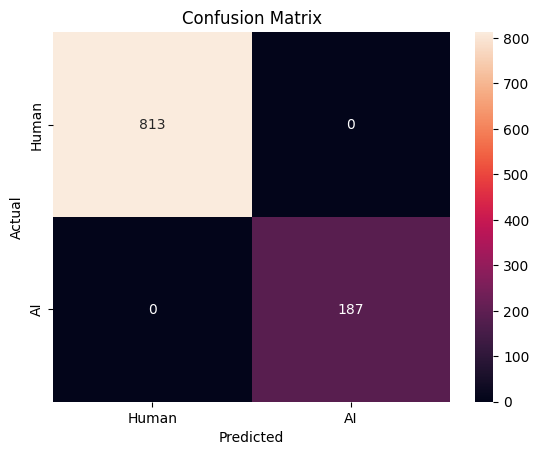

In [27]:
# predicting/ evaluating based on the Logistic Regression:
y_pred = clf.predict(X_test_vec)
print(classification_report(y_test, y_pred, target_names=['Human', 'AI']))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
report_log = classification_report(y_test, y_pred_log, output_dict=True)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB()
nb_clf.fit(X_train_vec, y_train)

MultinomialNB()

In [35]:
y_pred_nb = nb_clf.predict(X_test_vec)

              precision    recall  f1-score   support

       Human       1.00      0.97      0.98       813
          AI       0.88      0.99      0.93       187

    accuracy                           0.97      1000
   macro avg       0.94      0.98      0.96      1000
weighted avg       0.98      0.97      0.97      1000



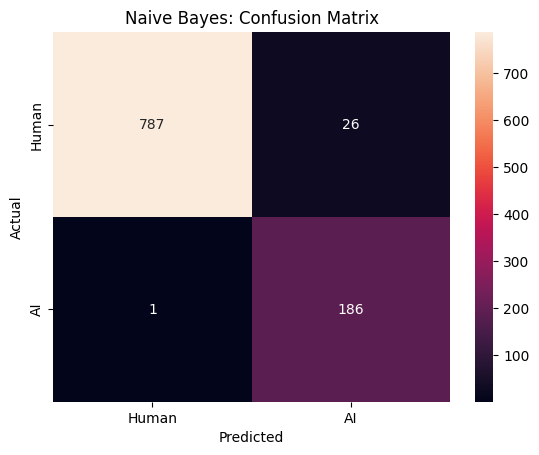

In [36]:
print(classification_report(y_test, y_pred_nb, target_names=['Human', 'AI']))

# Optional: confusion matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb, output_dict=True, target_names=['Human', 'AI'])

sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes: Confusion Matrix')
plt.show()

In [37]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
rf_clf.fit(X_train_vec, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [39]:
y_pred_rf = rf_clf.predict(X_test_vec)


              precision    recall  f1-score   support

       Human       1.00      1.00      1.00       813
          AI       1.00      1.00      1.00       187

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



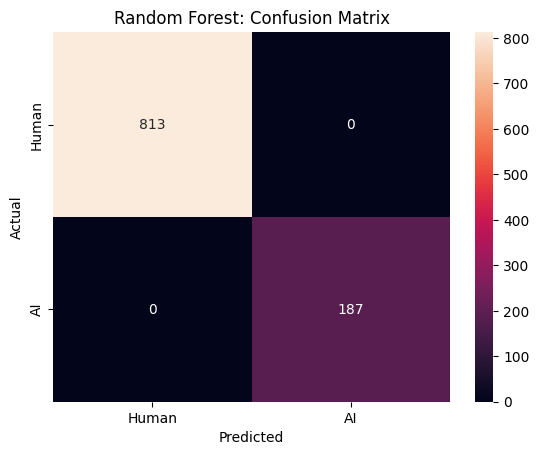

In [40]:
print(classification_report(y_test, y_pred_rf, target_names=['Human', 'AI']))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest: Confusion Matrix')
plt.show()

In [49]:
# Bert
from transformers import BertTokenizerFast, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import torch

In [56]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [50]:
train_texts, val_texts, train_labels, val_labels = train_test_split(df_bert['text'], df_bert['label'], test_size=0.2, random_state=42)

In [51]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=512)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [52]:
class AIDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()} | {'labels': torch.tensor(self.labels[idx])}
    def __len__(self):
        return len(self.labels)

train_dataset = AIDataset(train_encodings, list(train_labels))
val_dataset = AIDataset(val_encodings, list(val_labels))

In [53]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [1]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=50,
    weight_decay=0.01,
    eval_strategy="epoch",
    logging_dir='./logs',
    logging_steps=10,
    save_strategy='epoch',
    report_to="none"
)

NameError: name 'TrainingArguments' is not defined

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)
trainer.train()

In [ ]:
eval_result = trainer.evaluate()
print(eval_result)

In [ ]:
# get the predictions from the bert model
predictions = trainer.predict(val_dataset)

In [ ]:
# extract predicted labels
y_pred_bert = predictions.predictions.argmax(axis=1)

In [ ]:
# get the ground truth label
y_test_bert = predictions.label_ids

In [ ]:
report_bert = classification_report(y_test_bert, y_pred_bert, output_dict=True, target_names=["Human", "AI"])

In [ ]:
# Compare Accuracy, F! and ROC-AUC

In [ ]:
def extract_metrics(report_dict, model_name):
    return {
        'Model': model_name,
        'Accuracy': report_dict['accuracy'],
        'Precision (Human)': report_dict['Human']['precision'],
        'Recall (Human)': report_dict['Human']['recall'],
        'F1-Score (Human)': report_dict['Human']['f1-score'],
        'Precision (AI)': report_dict['AI']['precision'],
        'Recall (AI)': report_dict['AI']['recall'],
        'F1-Score (AI)': report_dict['AI']['f1-score'],
    }

In [ ]:
summary = []

summary.append(extract_metrics(report_log, 'Logistic Regression'))
summary.append(extract_metrics(report_nb, 'Naive Bayes'))
summary.append(extract_metrics(report_rf, 'Random Forest'))
summary.append(extract_metrics(report_bert, 'BERT'))

In [ ]:
df_summary = pd.DataFrame(summary)
df_summary = df_summary.round(3)  # Optional rounding
print(df_summary)